In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
import statsmodels.api as sm

## Logistic regrssion 용 데이터

In [2]:
#  해당 코드는 수정하지 마세요
from sklearn.datasets import make_classification


X, y = make_classification(n_features=8, n_informative=5,
                           n_redundant=3, n_clusters_per_class=1, random_state=4, n_samples =1000 )

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

* ### y와의 상관관계정도
차례대로 0번째 특성, ......., 7번째 특성

In [4]:
d=[]
for i in range(8):  #특성이 8개여서 0부터 7까지 for 함수를 돌렸음
    a=x_train[:,i]  #이 과정은 슬라이싱 과정 즉 각 특징이 y값과 얼마나 상관관계가 있는지 알기 위하여 측정
    c=np.corrcoef(a,y_train)#상관관계값 c에 넣음
    k=c[0,1]#이때 c는 2x2 행렬이 나온다. diag는 각자 자신과 자신의 상관관계를 나타내기 때문에 1이 나온다. 따라서 1,0 또는 0,1의 값이 y값과 특징의 상관관계를 측정한 값이다.
    d.append(format(k,'.3f'))#각 상관관계값을 빈 리스트 d에 넣는다.
print(d)

['0.033', '-0.593', '0.613', '0.025', '0.049', '0.703', '0.648', '0.591']


correlation coefficient 가 높은 5개의 feature 특성이 __5번째,6번째,2번째,7번째,1번째__ 순인것을 알 수 있다.

In [6]:
#5th feature     상관관계 : 1순위
#6th feature   상관관계 : 2순위
#2th feature   상관관계 : 3순위
#7th feature   상관관계 : 4순위
#1th feature  상관관계 : 5순위
index=['5th_f','6th_f','2nd_f','7th_f','1st_f'] # index와 cols 을 사용하기 위하여 이렇게 넣었고 순서는 상관관계 순이다.
cols=index

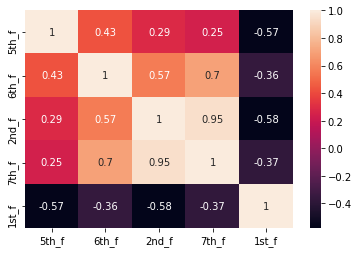

In [7]:
q=[[],[],[],[],[]]#히트맵을 그릴때 필요한 행렬이다.
k=0 #q에 집어넣을 때 사용할 인덱스 변수
for i in [5,6,2,7,1]:
    for j in [5,6,2,7,1]:
        corrMed=(np.corrcoef(x_train[:,i],x_train[:,j])[0,1])#상관관계 값 측정
        q[k].append(corrMed)# q에 넣기
    k=k+1
df=pd.DataFrame(q,index=index,columns=cols)#히트맵으로 만들기 위해 dataframe 형식으로 저장한다.
sns.heatmap(df,annot=True)#히트맵 생성

## 1B

2가지 방면으로 측정해 보았다 하나는 로지스틱을 내가 직접 select하지 않고 penalty로 l1을 주어 알고리즘이 직접 특징을 지우는 것이고 다른 하나는 내가 직접 select하여 정확도를 측정하는 것이다.

In [8]:
logr=LogisticRegression(C=0.01,penalty='l1',solver='liblinear').fit(x_train,y_train)
print(logr.coef_.T)
acc=logr.score(x_test,y_test)
print("테스트 정확도{:.2f}".format(acc))

[[ 0.        ]
 [-0.0553155 ]
 [ 0.42403543]
 [ 0.        ]
 [ 0.        ]
 [ 0.76948153]
 [ 0.36025893]
 [ 0.        ]]
테스트 정확도0.91


correlation coefficient array를 바탕으로 multiple logistic regression 모델에서 사용할 feature를 5번 6번 2번 특징들로 정하고  test acc을 측정해보겠다.

In [9]:
x_compare=(np.hstack((x_train[:,5:6],x_train[:,6:7],x_train[:,2:3])))
logr=LogisticRegression().fit(x_train,y_train)
acc=logr.score(x_test,y_test)
print("테스트정확도:",acc)

테스트정확도: 0.95


 ## 2번 문제 시작

## Linear Regression 용 데이터

In [10]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(california.DESCR)
X_train,X_test,y_train,y_test=train_test_split(california.data,california.target,random_state=0)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [11]:
cal = pd.DataFrame(california.data, columns = california.feature_names) #forward_selection 함수에 값을 넣기 위하여 cal을 DataFrame으로 변환한다.
california['Price'] = california.target#캘리포니아 집값을 예측하는 것이니 target을 price 에다가 넣었다.
X = cal      
y = california['Price']            
cal.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
def forward_selection(data, target, significance_level=0.05): #forward_selection 을 진행하기 위하여 아래와 같은 과정을 진행했다.
    initial_features = data.columns.tolist() # 특성들을 initial_feature에 넣어주었다.
    best_features = [] #가장 상관관계가 명확한 특징을 알기 위해 이와 같은 list 를 선언 하였다.
    remaining_features = list(set(initial_features)-set(best_features))#남아있는 특징 길이 계산
    while (len(remaining_features)>0):# 모든 feature 를 비교하기 위해 remaining_feature 길이 값을 기준으로 while함수를 진행하였다.
        remaining_features = list(set(initial_features)-set(best_features))#남아있는 특징 길이 계산
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
            
    if len(best_features)>4 : #4개까지 선택하라고 하였으므로 아래와 같은 과정을 진행하였다.
        best_features=best_features[0:4]
    return best_features

In [13]:
forward_selection(X,y)#상관관계가 가장 높은 특징들이 아래와 같이 있다.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


['MedInc', 'HouseAge', 'Latitude', 'Longitude']

##### 위의 식으로 보아 가장처음에 MedInc 마지막으로 'Longitude'가 뽑힌것을 알 수 있다.

소득중앙값 집 연식 위도 경도 등이 중요한 4가지 
각 0,1,6,7번째 값인것을 알 수 있다.

r2_score: 0.61


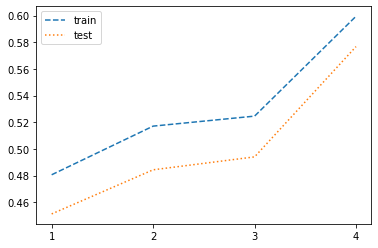

In [14]:
from sklearn.metrics import r2_score
X_com=np.hstack((california.data[:,0:1],california.data[:,1:2],california.data[:,6:8]))#6번과 7번은 이어져 있으니 6:8로 슬라이싱하였다.
y_pred=LinearRegression().fit(X_train,y_train).predict(X_train)
print('r2_score: {:.2f}'.format(r2_score(y_train, y_pred)))
def adj_r2(n_feature,n_samples,y_train,y_pred):#기본 r2값에 확장한 형태인 adj_r2함수 이다.
    return 1-((1-r2_score(y_train,y_pred))*(n_samples-1))/(n_samples-n_feature-1)



ans_list=[]#y축을 그릴 리스트(train 값)
y_pred=[1,2,3,4]#x축을 그릴 리스트
ans_list2=[]#y축을 그릴 리스트(test값)
y_pred2=[1,2,3,4]#x축을 그릴 리스트



#아래 과정은 특징 1개 일때,특징 2개일때 특징 3개일때, 특징 4개일때를 각자 slicing 하여 진행한 과정이다.

y_pred[0]=LinearRegression().fit(X_train[:,0:1],y_train).predict(X_train[:,0:1])
ans_list.append(adj_r2(1, 20640,y_train,y_pred[0]))


a=np.hstack((X_train[:,0:1],X_train[:,1:2]))
y_pred[1]=LinearRegression().fit(a,y_train).predict(a)
ans_list.append(adj_r2(2, 20640,y_train,y_pred[1]))

b=np.hstack((X_train[:,0:1],X_train[:,1:2],X_train[:,6:7]))
y_pred[2]=LinearRegression().fit(b,y_train).predict(b)
ans_list.append(adj_r2(3, 20640,y_train,y_pred[2]))

c=np.hstack((X_train[:,0:1],X_train[:,1:2],X_train[:,6:7],X_train[:,7:8]))
y_pred[3]=LinearRegression().fit(c,y_train).predict(c)
ans_list.append(adj_r2(4, 20640,y_train,y_pred[3]))




y_pred2[0]=LinearRegression().fit(X_train[:,0:1],y_train).predict(X_test[:,0:1])
ans_list2.append(adj_r2(1, 20640,y_test,y_pred2[0]))


a=np.hstack((X_train[:,0:1],X_train[:,1:2]))
y_pred2[1]=LinearRegression().fit(a,y_train).predict(np.hstack((X_test[:,0:1],X_test[:,1:2])))
ans_list2.append(adj_r2(2, 20640,y_test,y_pred2[1]))

b=np.hstack((X_train[:,0:1],X_train[:,1:2],X_train[:,6:7]))
y_pred2[2]=LinearRegression().fit(b,y_train).predict(np.hstack((X_test[:,0:1],X_test[:,1:2],X_test[:,6:7])))
ans_list2.append(adj_r2(3, 20640,y_test,y_pred2[2]))

c=np.hstack((X_train[:,0:1],X_train[:,1:2],X_train[:,6:7],X_train[:,7:8]))
y_pred2[3]=LinearRegression().fit(c,y_train).predict(np.hstack((X_test[:,0:1],X_test[:,1:2],X_test[:,6:7],X_test[:,7:8])))
ans_list2.append(adj_r2(4, 20640,y_test,y_pred2[3]))










x=[1,2,3,4]






plt.plot(x, ans_list, ls="--", label="train")
plt.plot(x, ans_list2, ls=":", label="test")
plt.xticks(x)
plt.legend(loc=2)
plt.show()
    






### 3번 문제

In [15]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid={'alpha':[0.001,0.01,0.1,1,10,100]} #최적의 파라미터를 찾기 위해 alpha값을 여러 스펙트럼으로 찾게한다.

In [17]:
grid_search=GridSearchCV(Lasso(),param_grid,cv=5)# 5-fold cross validation을 실행한다.

In [18]:
#최적의 파라미터 찾기
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'alpha': 0.001}

In [19]:
#최적하이퍼파라미터 탐색후 r^2값 출력
y_pred=Lasso(alpha=0.001).fit(X_train,y_train).predict(X_test)
print('r2_score: {:.2f}'.format(r2_score(y_test, y_pred)))

r2_score: 0.59
